<a href="https://colab.research.google.com/github/KostaKat/MAT442/blob/main/HW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Spaces - Overview

A **linear space** is a set of vectors $V$, that must hold the following properties:

1. **Vector addition**  $ \forall u, v \in V, \exists v_1 \in V \text{ such that } v_1 = u + v $
                        Meaning that adding vectors $u$ and $v$, $u+v$, that are in $V$ will result in a new vector $v_1$ in V
2. **Scalar Multiplication** - $\forall v \in V, \forall \alpha \in {\Bbb R}, \alpha v \in V$
                        Meaning any product of a scalar $\alpha$ that is in the real numbers and a vector $v$ in V will result in a vector $v_1$ in V

Additionally, when a set of vectors $U$ are multiplied by a scalar, and the results are added, also know a **linear combination**, it results in a new vector, and since linear spaces are closed under scalar multiplication and addition this vector is contain in it original set. The set of all linear combinations of vectors in $U$, makes a linear subspace.

Furthermore, **linear subspace** is a set of vectors $U$ that is a subset of $V$ ($ U \subseteq V $), that is also closed under vector addition and scalar multiplication. So, $ \forall v_1, v_2 \in U \text{ and } \forall \alpha \in {\Bbb R}, v_1 + v_2 \in U \text{ and } \alpha v_1 \in U $. All linear subspaces must contain $\vec{0}$.

Thus, the span of a set of vectors is an example of a linear subspace. The **span** in context to our linear subspace $ U \subseteq V $, is the linear subspace of $V$, which is, $U$ containing all possible linear of combinations of vector in $U$. This would be denoted as span(U).
The formal definition for span is a follows:

$ \text{Let } w_1, \dots, w_m \in V. \text{ The span of } {w}_1, \dots, {w}_m, \text{denoted span } ({w}_1, \dots, f{w}_m),$ $\text {is the set of all linear combinations of the } {w}_j\text{'s}. \text{ That is,} $


$\text{span}({w}_1, \dots, {w}_m) = \left\{ \sum_{j=1}^{m} \alpha_j {w}_j \mid \alpha_1, \dots, \alpha_m \in {R} \right\}. $
*This was found in my lecture slides*

Another way to analyze a matrix is it **column space**, denoted as col(V). It is span of the columns in a matrix. Simply put,it provides the range of values of each column that can be computed using the linear combinations of each vector in the set.


Examples and illustrations span, a combination of these terms, are found in the following scripts. Note: an example of column space will be represented later after another concept is introduced:


v1 =  [1 2 3]
v2 =  [4 5 6]


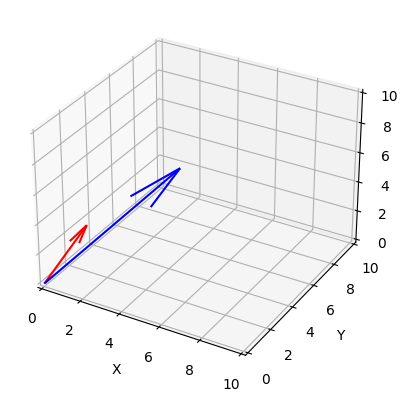

In [39]:
import numpy as np
import matplotlib.pyplot as plt

#Define two vectors in linear space R^3

v1 = np.array([1,2,3])
v2 = np.array([4,5, 6])

#print the vectors
print("v1 = ", v1)
print("v2 = ", v2)

#plot the vectors in R^3
fig = plt.figure()
ax = fig.add_subplot( projection='3d')
ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='b')
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



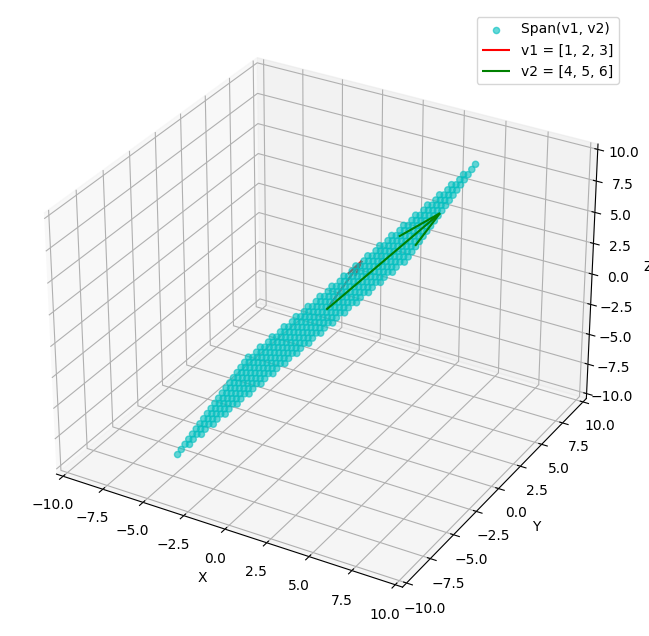

In [40]:
# Span of two vectors

# define a set of scalars for span so that we can get a linear subspace
scalars = np.linspace(-1, 1, 20)  # 20 values from -2 to 2

# calculate span of vectors v1 and v2
span_set = [a1 * v1 + a2 * v2 for a1 in scalars for a2 in scalars]

# convert to a NumPy array for easier manipulation
span_array = np.array(span_set)

# Plot the span in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(span_array[:, 0], span_array[:, 1], span_array[:, 2], color='c', alpha=0.6, label='Span(v1, v2)')

ax.quiver(0, 0, 0, v1[0], v1[1], v1[2], color='r', label='v1 = [1, 2, 3]')
ax.quiver(0, 0, 0, v2[0], v2[1], v2[2], color='g', label='v2 = [4, 5, 6]')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_zlim([-10, 10])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.grid(True)
ax.legend()
plt.show()


It is helpful to determine if there is no redundant data in a dataset. This subsection will help achieve this via the dimension of a linear space.

The first tool to help determine if a set of vectors is not redundant is linear independence. Vectors are **linearly independent** if none of them can be expressed as a linear combination of another. Formally, this is defined as: $\sum_{j=1}^{m} \alpha_j \mathbf{u}_j = 0 \implies \alpha_j = 0, \ \forall j.$

If a set of vectors is not linearly independent, they are linearly dependent.  An interesting property of this is that you can remove a linearly dependent vector from it's vector space and maintain the same span. The formal idea of this is the **Characterization of Linearly Dependent Sets**.

Furthermore, it is helpful to examine linear subspaces with a tool called a **basis**. A basis provides a representation of a subspace in a digestible form by listing all vectors in a subspace that are linearly independent. It is more formally defined as:

$\newline\text{Let } \mathbf{u}_1, \dots, \mathbf{u}_n \in U. \text{ A basis of } U \text{ is a list of vectors } \mathbf{u}_1, \dots, \mathbf{u}_n \text{ in } U \text{ that:}$

$ 1. \text{span } (U), \text{ that is, } U = \text{span}(\mathbf{u}_1, \dots, \mathbf{u}_n) \newline 2. \text{are linearly independent} \newline \newline$

Additionally, a vector space can have multiple bases, each with the same number of elements. The number of vectors in any basis is called the dimension of the vector space. This is formally called the **Dimension Theorem**. For matrices, the dimension of the column space is known as the **rank** of the matrix. This is helpful when trying to compute the dimension of a vector space because vectors space can be represented as a matrix.

The following are examples applying these concepts in python:

In [41]:
# check if a vector space is linearly independent
from sympy import Matrix

# Define vector space as a matrix A with 3 vectors as columns (v1, v2, v3)
A = Matrix([
    [1, 2, 3],
    [4, 5, 6],
    [2, 4, 6]
])
#v1 = 1 4 2
#v2 = 2 5 4
#v3 = 3 6 6

# Calculate the rank of the full matrix A
rank_A = A.rank()
print(f"Initial rank of matrix A: {rank_A}")
print(f"Is vector space linearly independent? {rank_A == A.shape[1]}")



Initial rank of matrix A: 2
Is vector space linearly independent? False


In [42]:
# Remove dependent vectors from the vector space using basis of column space to check if the span remains the same
# The goal is to display the Characterization of Linearly Dependent Sets

# Calculate the basis for the column space
column_space_basis = A.columnspace()

#create a matrix of independent vectors
ind_matrix = Matrix.hstack(*column_space_basis)

print("Independent Vectors:\n")
display(ind_matrix)

print("Dependent Vectors:\n")
for i in range(A.shape[1]):
    if A.col(i) not in column_space_basis:
        display(A.col(i))

# Print the rank and check if the span is the same
print("\nRank after removal:", ind_matrix.rank())
print("Is span the same?", A.rank() == ind_matrix.rank())


Independent Vectors:



Matrix([
[1, 2],
[4, 5],
[2, 4]])

Dependent Vectors:



Matrix([
[3],
[6],
[6]])


Rank after removal: 2
Is span the same? True


## Orthogonality    

To dive, further in orthogonality the following two definitions need to be introduced:

The **inner product** of two vectors $\mathbf{u}, \mathbf{v} \in \mathbb{R}^n$ is defined as:

$\langle \mathbf{u}, \mathbf{v} \rangle = \sum_{i=1}^{n} u_i v_i
$

The **norm** of a vector $\mathbf{u} \in \mathbb{R}^n $ is the square root of the inner product of the vector with itself:

$
\|\mathbf{u}\| = \sqrt{\langle \mathbf{u}, \mathbf{u} \rangle}
$


A list of vectors $\mathbf{u}_1, \dots, \mathbf{u}_m$ is **orthonormal** if the vectors are pairwise orthogonal and each vector has norm 1. This means: $\forall i \text{ and all } j \neq i, \langle \mathbf{u_i}, \mathbf{v_j} \rangle = 0 \text{ and } \|\mathbf{u_i}\| = 1 $ This set makes an orthonormal bases.

**Orthonormal Basis Expansion** is a powerful theorem that allows you to make any vector in a given vector space using linear combinations of the vectors in the orthonormal bases of that space.
This is the formal Orthonormal Basis Expansion :
Let $\textbf{q}_1,\dots,\textbf{q}_m \text{be an orthonormal basis of } \mathscr{U} \text{ and let } \textbf{u}\in \mathscr{U}. \text{ Then } \textbf{u}=\sum_{j=1}^m\langle\textbf{u},\textbf{q}_j\rangle\textbf{q}_j.$



In [43]:
# Taking the Inner Product of Two Vectors

u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

# Calculate the inner product of u and v
inner_product = np.dot(u, v)

print(f"Inner product of u and v: {inner_product}")

Inner product of u and v: 32


In [44]:
# Calculate the norm of vector u
norm_u = np.linalg.norm(u)

print(f"Norm of vector u: {norm_u}")


Norm of vector u: 3.7416573867739413


In [45]:
# Check if two vectors are orthogonal

# Define the matrix representing a vector space A with vectors as columns
A = Matrix([[1, 1],
        [1, -1]])

v1 , v2 = A[:, 0], A[:, 1]


#check if the vectors are orthogonal
is_orthogonal = v1.dot(v2) == 0

#check if vectors are normal
is_normal = v1.norm() == 1 and v2.norm() == 1


# if the vectors are orthogonal and normal, then they are orthonormal
is_orthonormal = is_orthogonal and is_normal

print(f"Are the vectors orthogonal? {is_orthogonal}")
print(f"Are the vectors normal? {is_normal}")
print(f"Are the vectors orthonormal? {is_orthonormal}")



Are the vectors orthogonal? True
Are the vectors normal? False
Are the vectors orthonormal? False


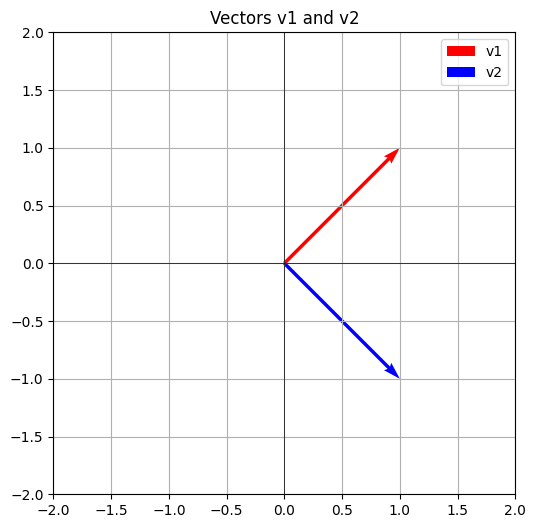

In [46]:
#plotting the non Orthonormal vectors, but orthogonal vectors

# Define the vectors
v1 = np.array([1, 1])
v2 = np.array([1, -1])

# Plot the vectors
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='v1')
plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='v2')

# Set the limits
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Add grid, labels, and legend
plt.grid()
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.title('Vectors v1 and v2')

# Show the plot
plt.show()


In [47]:
from sympy import sqrt
#Apply Orthonormal Basis to a Vector
#define matrix A, that represents a vector space
A = Matrix([[1/sqrt(2), 1/sqrt(2)],
        [1/sqrt(2), -1/sqrt(2)]])

#check if the matrix is orthonormal
is_orthonormal = A[0, :].norm() == 1 and A[1, :].norm() == 1 and A[0, :].dot(A[1, :]) == 0

if is_orthonormal:
    #define a vector
    v = Matrix([1, 2])

    # Expand v in terms of the orthonormal basis
    expanded_u= A.T * v
    print(f"Expansion coefficients: {expanded_u}")



Expansion coefficients: Matrix([[3*sqrt(2)/2], [-sqrt(2)/2]])


Let's say that we want to find a vector $v$ in a given subspace $\mathscr{U}$ however $v \notin \mathscr{U}$. Let's call this the vector we want to find $v*$. We could find this using the **Best Approximation Theorem**, essentially we want to find $\min_{v^* \in \mathscr{U}} \|v^* - v\|$. It helps us find the best $v*$ by minimizing the distance between  $v*$'s and $v$'s norm.

Solving this geometrically we can solve this by doing the following example:

Consider the two-dimensional case with a one-dimensional subspace, say $ \mathscr{U} = \text{span}(\mathbf{u}_1) $ with $\|\mathbf{u}_1\| = 1 $. The solution $ v^* $ has the property that the difference $ v - v^* $ makes a right angle with $\mathbf{u}_1 $, meaning it is orthogonal to $\mathbf{u}_1$.

Letting $ v^* = \alpha^* \mathbf{u}_1 $, this geometric condition translates into:

$
0 = \langle \mathbf{u}_1, v - v^* \rangle = \langle \mathbf{u}_1, v - \alpha^* \mathbf{u}_1 \rangle = \langle \mathbf{u}_1, v \rangle - \alpha^* \langle \mathbf{u}_1, \mathbf{u}_1 \rangle = \langle \mathbf{u}_1, v \rangle - \alpha^*
$

which implies that:


$ v^* = \langle \mathbf{u}_1, v \rangle u_1$

The vector $v*$ that was just solved for is a **Orthogonal Projection** and is defined formally as follows:

 Let  $\mathscr{U} \subseteq V $ be a linear subspace with orthonormal basis $ \mathbf{q}_1, \dots, \mathbf{q}_m $. The orthogonal projection of $ \mathbf{v} \in V $ onto $ \mathscr{U} $ is defined as:

$
P_{\mathscr{U}} \mathbf{v} = \sum_{j=1}^{m} \langle \mathbf{v}, \mathbf{q}_j \rangle \mathbf{q}_j.
$

This projection solves $\min_{v^* \in \mathscr{U}} \|v^* - v\|$ and makes it the best project of $v$ on the subspace $\mathscr{U}$
\
Supporting theorems, **Pythagorean Theorem** and **Orthogonal Decomposition** proves that $v*$ is the smallest possible distance from $v$ to $\mathscr{U}$
and the **Cauchy-Schwarz Inequality** proves that the projection won't surpass the subspace $\mathscr{U}$

This projection can be written in matrix form as:



$v* = QQ^Tv$, where Q is a matrix with its column containing orthonormal basis vector of $\mathscr{U} $





## Gram–Schmidt process
Before we project a vector $v$ onto a subspace $\mathscr{Q}$ let's introduce the Gram-Schmidt process to ensure that we can make any linear subspace orthonormal. Note that these vectors need to be normal The **Gram–Schmidt process** formally works follows:


$
\begin{aligned}
\mathbf{u}_1 & = \mathbf{v}_1, \\
\mathbf{u}_2 & = \mathbf{v}_2 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_2), \\
\mathbf{u}_3 & = \mathbf{v}_3 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_3) - \text{proj}_{\mathbf{u}_2}(\mathbf{v}_3), \\
\mathbf{u}_4 & = \mathbf{v}_4 - \text{proj}_{\mathbf{u}_1}(\mathbf{v}_4) - \text{proj}_{\mathbf{u}_2}(\mathbf{v}_4) - \text{proj}_{\mathbf{u}_3}(\mathbf{v}_4), \\
& \vdots \\
\mathbf{u}_k & = \mathbf{v}_k - \sum_{j=1}^{k-1} \text{proj}_{\mathbf{u}_j}(\mathbf{v}_k).
\end{aligned}
$

$
\begin{aligned}
\mathbf{e}_1 & = \frac{\mathbf{u}_1}{\|\mathbf{u}_1\|}, \\
\mathbf{e}_2 & = \frac{\mathbf{u}_2}{\|\mathbf{u}_2\|}, \\
\mathbf{e}_3 & = \frac{\mathbf{u}_3}{\|\mathbf{u}_3\|}, \\
\mathbf{e}_4 & = \frac{\mathbf{u}_4}{\|\mathbf{u}_4\|}, \\
& \vdots \\
\mathbf{e}_k & = \frac{\mathbf{u}_k}{\|\mathbf{u}_k\|}.
\end{aligned}
$



However, for numerical stability the modified version must be used when implementing it in a computer:


$\mathbf{u}_k^{(1)} = \mathbf{v}_k - \text{proj}_{\mathbf{e}_1}(\mathbf{v}_k)$

$\mathbf{u}_k^{(2)} = \mathbf{u}_k^{(1)} - \text{proj}_{\mathbf{e}_2}(\mathbf{u}_k^{(1)})$

$\vdots$

$\mathbf{u}_k^{(k-1)} = \mathbf{u}_k^{(k-2)} - \text{proj}_{\mathbf{e}_{k-1}}(\mathbf{u}_k^{(k-2)})$



$
 \mathbf{e}_k = \frac{\mathbf{u}_k^{(k-1)}}{\|\mathbf{u}_k^{(k-1)}\|}
$
Here is an implementation of the formula:

In [48]:
def modified_gram_schmidt(V):
    n, k = V.shape
    U = np.zeros((n, k))
    U[:, 0] = V[:, 0] / np.linalg.norm(V[:, 0])
    for i in range(1, k):
        U[:, i] = V[:, i]
        for j in range(i):
            U_j_norm = np.linalg.norm(U[:, j])  # Pre-calculate norm
            U[:, i] -= (np.dot(U[:, i], U[:, j]) / (U_j_norm ** 2)) * U[:, j]
        U[:, i] /= np.linalg.norm(U[:, i])  # Normalize the i-th vector
    return U

In [49]:
Q = np.array([[1, 0 ,2],
        [-1,1,3],
        [0, 1, 1]])

# apply the modified Gram-Schmidt process to the matrix Q
Q = modified_gram_schmidt(Q)

v = np.array([1, 2, 293])
# check if the matrix is orthonormal
norm_check = np.allclose(np.linalg.norm(Q, axis=1), 1)


dot_product_check = np.allclose(np.dot(Q[0, :], Q[1, :]), 0) and \
                    np.allclose(np.dot(Q[0, :], Q[2, :]), 0) and \
                    np.allclose(np.dot(Q[1, :], Q[2, :]), 0)

print(f"Is the matrix orthonormal? {norm_check and dot_product_check}")

v_star = Q * (Q.T * v)


# Check if the vector v_star is in the column space of Q
try:
    c = np.linalg.solve(Q, v_star) # Find the coefficients of the linear combination
    is_in_column_space = np.allclose(Q @ c, v_star)
except np.linalg.LinAlgError:
    is_in_column_space = False

print(f"Is v_star in the column space of Q? {is_in_column_space}")



Is the matrix orthonormal? True
Is v_star in the column space of Q? True


## Eigenvalues and Eigenvectors

Ther
**Definition 1.2.21 (Eigenvalues and Eigenvectors):**  
Let $ A \in \mathbb{R}^{d \times d} $ be a square matrix. Then $\lambda \in \mathbb{R} $ is an eigenvalue of $ A $ if there exists a nonzero vector $ \mathbf{x} \neq \mathbf{0} $ such that:
$
A\mathbf{x} = \lambda \mathbf{x}.
$

The vector $\mathbf{x} $ is referred to as an eigenvector.

However not all vectors have an eigenvalue, at most a d x d matrix has d different eigenvalues:

**Lemma 1.2.23 (Number of Eigenvalues):**  
Let $ A \in \mathbb{R}^{d \times d} $ and let $ \lambda_1, \dots, \lambda_m $ be distinct eigenvalues of $ A $ with corresponding nonzero eigenvectors $ \mathbf{x}_1, \dots, \mathbf{x}_m $. Then $ \mathbf{x}_1, \dots, \mathbf{x}_m $ are linearly independent. As a result, $ m \leq d $.


**Theorem 1.2.24 (Diagonal and Similar Matrices)**

Let $A$ be similar to a matrix $D = \text{diag}(\lambda_1, \dots, \lambda_d)$ with distinct diagonal entries, that is, there exists a nonsingular matrix $P$ such that

$
A = PDP^{-1}.
$

Let $ \mathbf{p}_1, \dots, \mathbf{p}_d $ be the columns of $P$. Then

$
A\mathbf{p}_i = \lambda_i \mathbf{p}_i.
$

**Theorem 1.2.25**

If $A$ is symmetric, then any two eigenvectors from different eigenspaces are orthogonal.

**Theorem 1.2.26 (The Spectral Theorem for Symmetric Matrices)**

An $n \times n$ symmetric matrix $A$ has the following properties:

- $A$ has $n$ real eigenvalues, counting multiplicities.
- If $\lambda$ is an eigenvalue of $A$ with multiplicity $k$, then the eigenspace for $\lambda$ is $k$-dimensional.
- The eigenspaces are mutually orthogonal.
- $A$ is orthogonally diagonalizable.

**Spectral Decomposition of Symmetric Matrices**

Using the column-row expansion of a product, we can write

$
A = \lambda_1 \mathbf{v}_1 \mathbf{v}_1^T + \lambda_2 \mathbf{v}_2 \mathbf{v}_2^T + \dots + \lambda_n \mathbf{v}_n \mathbf{v}_n^T.
$

This representation is called the spectral decomposition of $A$.

**Theorem 1.2.27**: Let $A$ be an $n \times n$ symmetric matrix with an orthogonal diagonalization $A = PDP^{-1}$. The columns of $P$ are orthonormal eigenvectors $\mathbf{v}_1, \dots, \mathbf{v}_n$ of $A$. Assume that the diagonal of $D$ are arranged so that $\lambda_1 \leq \lambda_2 \leq \dots \leq \lambda_n$. Then
$
\min_{\mathbf{x} \neq \mathbf{0}} \frac{\mathbf{x}^T A \mathbf{x}}{\mathbf{x}^T \mathbf{x}} = \lambda_1
$
is achieved when $\mathbf{x} = \mathbf{v}_1$ and
$
\max_{\mathbf{x} \neq \mathbf{0}} \frac{\mathbf{x}^T A \mathbf{x}}{\mathbf{x}^T \mathbf{x}} = \lambda_n
$
is achieved when $\mathbf{x} = \mathbf{v}_n$.



In [50]:
#Finding Eigenvalues and Eigenvector
from scipy.linalg import eig

# Define a symmetric matrix A
A = np.array([[4, 1, 2],
              [1, 3, 0],
              [2, 0, 5]])

# Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

# Since A is symmetric, eigenvalues should be real
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Eigenvalues: [6.66907909 1.85489731 3.4760236 ]
Eigenvectors:
 [[-0.63117897 -0.67931306 -0.37436195]
 [-0.17202654  0.59323331 -0.7864357 ]
 [-0.75632002  0.43198148  0.49129626]]


In [51]:
# Check if eigenvectors are orthonormal
orthonormal_check = np.allclose(np.dot(eigenvectors.T, eigenvectors), np.eye(eigenvectors.shape[0]))

print(f"Are the eigenvectors orthonormal? {orthonormal_check}")

Are the eigenvectors orthonormal? True


In [52]:
# Spectral decomposition
spectral_decomposition = sum(eigenvalues[i] * np.outer(eigenvectors[:, i], eigenvectors[:, i])
                             for i in range(len(eigenvalues)))

print("Spectral Decomposition of A:\n", spectral_decomposition)


Spectral Decomposition of A:
 [[ 4.00000000e+00  1.00000000e+00  2.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00 -1.77635684e-15]
 [ 2.00000000e+00 -1.77635684e-15  5.00000000e+00]]


In [53]:
# Theorem 1.2.27

# Sort the eigenvalues and eigenvectors in ascending order
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# extract max and min
lambda_1 = sorted_eigenvalues[0]
lambda_n = sorted_eigenvalues[-1]
v1 = sorted_eigenvectors[:, 0]
vn = sorted_eigenvectors[:, -1]

# Minimum value of (x^T A x) / (x^T x) is lambda_1 and is achieved with v1
min_value = np.dot(v1.T, np.dot(A, v1)) / np.dot(v1.T, v1)

# Maximum value of (x^T A x) / (x^T x) is lambda_n and is achieved with vn
max_value = np.dot(vn.T, np.dot(A, vn)) / np.dot(vn.T, vn)

print(f"Sorted Eigenvalues: {sorted_eigenvalues}")
print(f"Sorted Eigenvectors:\n{sorted_eigenvectors}")
print(f"Minimum value achieved: {min_value} (Expected: {lambda_1})")
print(f"Maximum value achieved: {max_value} (Expected: {lambda_n})")


Sorted Eigenvalues: [1.85489731 3.4760236  6.66907909]
Sorted Eigenvectors:
[[-0.67931306 -0.37436195 -0.63117897]
 [ 0.59323331 -0.7864357  -0.17202654]
 [ 0.43198148  0.49129626 -0.75632002]]
Minimum value achieved: 1.8548973087995777 (Expected: 1.8548973087995744)
Maximum value achieved: 6.669079088282288 (Expected: 6.669079088282289)
